# Group Members:

#### Lisheng Lexson Luo 

#### Stephen Kusrianto 

#### Lim Seng Hui (Samuel) 

#### Stanley Wong 

# Quicklinks!
# [Question 1](#Q1)
# [Question 2](#Q2)
# [Question 3](#Q3)
# [Question 4](#Q4)
# [Question 5](#Q5)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from pandas_datareader import data as pdr
import datetime as dt
import yfinance as yf
import warnings
# warnings.resetwarnings()
warnings.filterwarnings("ignore")


In [2]:
def df_builder(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date']) #convert to pandas datetime for indexing
    df.set_index(['Date','GVKEY'],inplace = True)
    df['Return'] = df['Return']/100 #convert to decimal
    return df

In [3]:
GPEX1 = df_builder('GPEX1set1.csv')
GPEX2 = df_builder('GPEX1set2.csv')
GPEX3 = df_builder('GPEX1set3.csv')

In [4]:
def cs_ols(df, threshold=30):
    cs_stats = []
    cs_result = {}
    
    for dates, datapoints in df.groupby('Date'):
        if datapoints.count().min() >= threshold:        
            OLS = sm.OLS(datapoints['Return'], sm.add_constant(datapoints.iloc[:,1:])).fit()
            OLS_stats = OLS.params 
            OLS_stats.name = dates
            OLS_stats['Adj $\mathbb{R}^2$'] = OLS.rsquared_adj
            OLS_stats['N.Obs'] = OLS.nobs
            cs_stats.append(OLS_stats)
            cs_result[dates.strftime('%Y-%m-%d')] = OLS
    
    cs_stats = pd.DataFrame(cs_stats)
    return cs_stats, cs_result

#  <a id='Q1'><font color = 'red'>Question 1</font></a>

In [5]:
GPEX1_summary,GPEX1_results = cs_ols(GPEX1)
GPEX2_summary,GPEX2_results = cs_ols(GPEX2)
GPEX3_summary,GPEX3_results = cs_ols(GPEX3)

## Model 1

In [6]:
GPEX1_summary.head(2)

,const,LogSize_-1,LogB/M_-1,"Return_-2,-12",Adj $\mathbb{R}^2$,N.Obs
1967-04-30,-0.007385,-0.000439,0.004839,0.127069,0.260407,39.0
1967-05-31,-0.036995,0.001527,-0.007863,-0.146485,0.169260,41.0


In [7]:
GPEX1_summary.tail(20)

,const,LogSize_-1,LogB/M_-1,"Return_-2,-12",Adj $\mathbb{R}^2$,N.Obs
2019-08-31,-0.036783,-0.001712,-0.001916,0.053777,0.015879,3702.0
2019-09-30,-0.013596,0.008546,0.030158,-0.038796,0.067908,3685.0
2019-10-31,-0.019680,0.004526,-0.000637,0.029990,0.015054,3612.0
2019-11-30,-0.002562,0.003886,-0.013128,-0.036935,0.008890,3629.0
2019-12-31,0.064604,-0.001202,0.017621,-0.020152,0.013839,3614.0
2020-01-31,0.061434,-0.015367,-0.027279,-0.000291,0.022052,3577.0
2020-02-29,-0.033240,-0.007448,-0.005352,-0.007484,0.004634,3564.0
2020-03-31,-0.252737,-0.002991,-0.050584,0.005838,0.046268,3546.0
2020-04-30,0.256116,-0.013799,-0.010500,-0.037973,0.016429,3696.0
2020-05-31,0.094314,-0.008170,-0.033578,-0.011722,0.025951,3620.0


## Model 2

In [8]:
GPEX2_summary.head(2)

,const,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,Adj $\mathbb{R}^2$,N.Obs
1969-09-30,-0.048675,-0.008152,-0.069288,0.018891,0.011621,-0.000750,0.604530,0.040377,-0.019947,32.0
1969-10-31,0.098726,-0.019197,-0.070382,0.028369,0.011166,-0.001144,-0.313717,0.041936,-0.079415,33.0


In [9]:
GPEX2_summary.tail(20)

,const,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,Adj $\mathbb{R}^2$,N.Obs
2019-08-31,-0.038108,-0.003056,-0.011633,0.042061,-0.010557,-8.738292e-06,0.001776,-0.020377,0.019377,2238.0
2019-09-30,0.020724,0.003928,0.023133,-0.061665,-0.025586,4.477874e-06,0.115217,-0.015797,0.107386,2222.0
2019-10-31,-0.024871,0.005969,0.000680,0.029154,-0.003850,1.244661e-05,-0.043082,-0.006038,0.011132,2181.0
2019-11-30,-0.023209,0.007495,-0.011787,-0.045643,-0.009626,1.533836e-05,-0.158941,0.023251,0.029838,2188.0
2019-12-31,0.014245,0.007614,0.030181,-0.006823,0.008050,-5.813007e-06,-0.098490,-0.006528,0.032423,2175.0
2020-01-31,0.039930,-0.015213,-0.033812,0.018844,0.006028,-9.869818e-06,0.013898,-0.008437,0.049973,2154.0
2020-02-29,-0.020691,-0.009133,-0.007296,-0.021123,-0.032149,-3.796644e-06,-0.109262,0.056489,0.012921,2160.0
2020-03-31,-0.277499,0.004159,-0.039177,0.021349,0.038635,2.967986e-05,-0.008433,-0.023924,0.051524,2148.0
2020-04-30,0.236999,-0.009323,0.013630,-0.007664,-0.059071,-2.732032e-05,-0.271140,0.172985,0.052778,2163.0
2020-05-31,0.065552,-0.002381,-0.019249,-0.021186,0.029225,9.908234e-06,-0.151483,0.026061,0.035344,2125.0


## Model 3

In [10]:
GPEX3_summary.head(2)

,const,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1,Adj $\mathbb{R}^2$,N.Obs
1970-01-31,-0.00176,-0.015496,0.009734,-0.162988,0.040739,-0.000302,-1.679048,0.069826,1.769051,0.050180,-0.043758,-0.000002,0.016398,-0.043461,0.424115,30.0
1970-02-28,-0.15158,0.007237,-0.044959,-0.085257,0.042866,-0.001551,-0.958331,0.035893,0.705110,0.068943,-0.452827,0.000004,0.003314,-0.002528,0.327306,32.0


In [11]:
GPEX3_summary.tail(20)

,const,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1,Adj $\mathbb{R}^2$,N.Obs
2019-08-31,-0.026077,-0.001105,-0.016201,0.016719,-0.018708,-0.000007,-0.017979,0.008421,-0.064278,-0.021915,-0.008952,-8.870083e-08,-0.008829,-0.000960,0.030507,2084.0
2019-09-30,0.017436,0.001711,0.009929,-0.066756,-0.034071,0.000009,0.091569,-0.005186,0.424443,-0.013981,-0.040349,2.423544e-08,0.002316,0.004073,0.133473,2060.0
2019-10-31,-0.031521,0.005931,0.010026,0.044033,0.013546,0.000008,-0.060105,-0.029419,-0.087498,0.030401,-0.071928,2.705097e-08,-0.006677,0.003292,0.030128,2039.0
2019-11-30,-0.009790,0.005450,-0.007184,-0.034318,-0.003257,0.000009,-0.134051,0.026054,-0.274361,0.008453,-0.016728,3.927101e-08,-0.001249,-0.000844,0.032964,2031.0
2019-12-31,0.042754,0.003701,0.031870,-0.006255,-0.026794,-0.000007,-0.085119,-0.008555,-0.121144,-0.002449,0.075486,5.867450e-08,0.010921,-0.007308,0.039457,2018.0
2020-01-31,0.054868,-0.011588,-0.026155,0.013172,0.007758,-0.000011,-0.010959,-0.012424,-0.275433,0.002134,-0.012574,-1.317629e-07,-0.017242,-0.000449,0.061992,2006.0
2020-02-29,-0.013502,-0.011005,-0.007126,-0.005188,0.001564,-0.000011,-0.039187,0.015483,-0.171546,0.010377,-0.016599,4.996392e-08,-0.009741,-0.001213,0.013124,2004.0
2020-03-31,-0.240332,0.011097,-0.021928,-0.008646,0.028043,0.000022,-0.035173,-0.010573,-0.523013,-0.000672,0.065230,-2.690584e-07,-0.048845,0.000035,0.103305,1967.0
2020-04-30,0.167073,-0.009077,0.007770,0.030060,0.011475,-0.000019,-0.112447,0.067116,-0.228332,-0.007711,0.005799,3.238332e-07,0.014184,0.002158,0.074427,1913.0
2020-05-31,0.056348,-0.001468,-0.017762,-0.016206,0.010457,0.000007,-0.126674,0.003764,-0.708178,0.006577,0.127718,5.767706e-08,-0.002050,0.003692,0.048855,1910.0


# <a id='Q2'><font color = 'red'>Question 2</font></a>

In [12]:
def coef_tester(df_summary,name):
    assert type(df_summary) == pd.DataFrame, 'Please input a DataFrame'
    assert type(name) == str, 'Please input a string value for column name'
    
    mean = df_summary.iloc[:, :-2].mean()
    std = df_summary.iloc[:, :-2].std()
    nobs = len(df_summary)
    tstat = mean / (std / np.sqrt(nobs))
    
    # find p-value for two-tailed test
    pval = scipy.stats.t.sf(abs(tstat), df=len(df_summary)-1)*2
    
    mean = pd.DataFrame(mean,columns = [name])
    tstat = pd.DataFrame(round(tstat,5),columns = [name])
    
    # convert coeff to string values & add stars if it passed the alpha pvalues (1/5/10%)
#     for i in range(len(mean[name])):
#         mean[name][i] = str(round(mean[name][i],5))
#         if pval[i] < 0.01:
#             mean[name][i] = mean[name][i] + ' ***'
#         elif pval[i] < 0.05:
#             mean[name][i] = mean[name][i] + ' **'
#         elif pval[i] < 0.1:
#             mean[name][i] = mean[name][i] + ' *'

    index = mean.index.get_level_values(0).to_list()
    mean.index = pd.MultiIndex.from_product([mean.index, ['coefficients']])
    tstat.index = pd.MultiIndex.from_product([tstat.index, ['t-statistic']])
    merged_df = pd.concat([mean, tstat])
    merged_df = merged_df.sort_index()
    merged_df = merged_df.loc[index,:]
    
    return merged_df

In [13]:
GPEX1_coef = coef_tester(GPEX1_summary,'GPEX1')
GPEX2_coef = coef_tester(GPEX2_summary,'GPEX2')
GPEX3_coef = coef_tester(GPEX3_summary,'GPEX3')
models_coef = pd.concat([GPEX1_coef,GPEX2_coef,GPEX3_coef],axis = 1).fillna('')

In [14]:
models_coef

GPEX1     GPEX2         GPEX3
const             coefficients  0.017795  0.017962  1.664159e-02
                  t-statistic    5.58257    5.6089  5.690500e+00
LogSize_-1        coefficients -0.001086 -0.001019 -8.658457e-04
                  t-statistic   -2.93076  -2.88823 -2.665990e+00
LogB/M_-1         coefficients  0.004723  0.003916  2.927986e-03
                  t-statistic     7.5652   6.23655  5.934510e+00
Return_-2,-12     coefficients  0.009976  0.008599  7.302413e-03
                  t-statistic    6.62617   5.82008  5.684470e+00
LogIssues_-1,-36  coefficients           -0.001977 -1.240360e-03
                  t-statistic             -1.79569 -1.336840e+00
Accruals_Yr-1     coefficients           -0.000008 -7.925339e-06
                  t-statistic             -1.61825 -1.782370e+00
ROA_Yr-1          coefficients            0.016454  1.410310e-02
                  t-statistic              3.14006  2.662820e+00
LogAG_Yr-1        coefficients            -0.00717 -5.822117e-03
                  t-statistic             -5.26668 -4.898320e+00
DY_-1,-12         coefficients                     -1.407749e-02
                  t-statistic                      -8.397200e-01
LogReturn_-13,-36 coefficients                     -5.700102e-04
                  t-statistic                      -1.030450e+00
LogIssues_-1,-12  coefficients                      2.840465e-03
                  t-statistic                       1.315450e+00
Turnover_-1,-12   coefficients                     -3.192653e-08
                  t-statistic                      -2.472430e+00
Debt/Price_Yr-1   coefficients                     -5.946853e-04
                  t-statistic                      -1.538770e+00
Sales/Price_Yr-1  coefficients                      4.059231e-04
                  t-statistic                       2.750620e+00

# <a id='Q3'><font color = 'red'>Question 3</font></a>

# <font color='red'>Forecast Method 1</font>

In [15]:
def forecast(df, df_summary, window = 120, start_date = '1980-1-31'):
    
    factorloadings = df_summary.iloc[:, :-2].rolling(window).mean().shift(1).dropna()
    
    characteristics = df.sort_index(level=0).loc[start_date:]
    df_actual_ret = df.loc[:,:'Return'].sort_index(level=0).reset_index(level=1).loc[start_date:]
    
    results = np.sum(characteristics.reset_index(level=1).iloc[:,2:] * factorloadings.iloc[:,1:],axis = 1) 
    results += factorloadings.iloc[:,0]
    results.reset_index(inplace = True,drop = True)
    
    df_Returns = df.sort_index(level=0).loc[start_date:,:'Return']
    df_Returns.rename(columns={'Return':'Actual Returns'},inplace = True)
    df_Returns.reset_index(inplace = True)
    df_Returns['Predicted Returns'] = results
    df_Returns = df_Returns.set_index(['Date','GVKEY'])
    
    return df_Returns

In [16]:
GPEX3_forecast = forecast(GPEX3,GPEX3_summary)

# <font color='red'>Forecast Result 1, Grouped by Date & GVKEYs (in Decimals)</font>

In [17]:
GPEX3_forecast

Actual Returns  Predicted Returns
Date       GVKEY                                    
1980-01-31 1004          0.226695           0.007877
           1010          0.211679           0.008359
           1020         -0.035714           0.009767
           1025          0.201539           0.015071
           1040         -0.008547           0.006613
...                           ...                ...
2021-03-31 264265       -0.046658           0.010056
           264416        0.251401           0.013081
           268208        0.110647           0.014967
           294524        0.019498           0.008743
           316056        0.158117           0.011992

[1204408 rows x 2 columns]

# <font color='red'> Forecast Method 2 (Same Results as Method 1)</font> 

In [18]:
def forecast2(df, df_summary, window = 120, start_date = '1980-1-31'):
    
    full_results = pd.DataFrame([])
    full_gvkeys = pd.DataFrame([])
    
    df_actual_ret = df.loc[:,:'Return'].sort_index(level=0).reset_index(level=1).loc[start_date:]
    factorloadings = df_summary.iloc[:, :-2].rolling(window).mean().shift(1).dropna()
    
    # First we reset index to take out GVKEY from multi-index, leaving only Datetime as the index for each datapoints
    characteristics = df.sort_index(level=0).reset_index(level=1).loc[start_date:]
    
    for i in range(len(factorloadings)):
        chara_at_t = characteristics.loc[characteristics.index.unique()[i]]
        GVKEY_at_t = df_actual_ret.loc[df_actual_ret.index.unique()[i]].GVKEY
        block_results = pd.DataFrame(np.sum(np.array(chara_at_t[chara_at_t['GVKEY'].isin(GVKEY_at_t)].iloc[:,2:]) * np.array(factorloadings.iloc[i:(i+1),1:]),axis=1) + factorloadings.iloc[i][0],
                                    columns=['Predicted Return'])
        block_GVKEYS = pd.DataFrame(chara_at_t[chara_at_t['GVKEY'].isin(GVKEY_at_t)].iloc[:,0])

        full_results = pd.concat([full_results, block_results])
        full_gvkeys = pd.concat([full_gvkeys , block_GVKEYS])
        
    full_results.index = full_gvkeys.index

    results = pd.concat([full_gvkeys, full_results], axis = 1)
    results.reset_index(inplace = True)
    results.rename(columns={'index':'Date'},inplace = True)
    results = results.set_index(['Date','GVKEY'])
    df_actual_ret.reset_index(inplace = True)
    df_actual_ret.rename(columns={'index':'Date'},inplace = True)
    df_actual_ret = df_actual_ret.set_index(['Date','GVKEY'])
    combined_results = df_actual_ret.merge(results, left_index = True, right_index = True)
    
    return combined_results

In [19]:
GPEX3_forecast2 = forecast2(GPEX3, GPEX3_summary, window = 120, start_date = '1980-1-31')

# <font color='red'>Forecast Result 2, Grouped by Date & GVKEYs (in Decimals)</font>

In [20]:
GPEX3_forecast2

Return  Predicted Return
Date       GVKEY                             
1980-01-31 1004    0.226695          0.007877
           1010    0.211679          0.008359
           1020   -0.035714          0.009767
           1025    0.201539          0.015071
           1040   -0.008547          0.006613
...                     ...               ...
2021-03-31 264265 -0.046658          0.010056
           264416  0.251401          0.013081
           268208  0.110647          0.014967
           294524  0.019498          0.008743
           316056  0.158117          0.011992

[1204408 rows x 2 columns]

# <a id='Q4'><font color = 'red'>Question 4</font></a>

In [21]:
def accuracy(df_forecast, signal = 'Predicted Returns'):
    
    df_forecast['Actual Direction'] = np.sign(df_forecast['Actual Returns'])
    df_forecast['Predicted Direction'] = np.sign(df_forecast[signal])
    df_forecast['Accuracy'] = abs(df_forecast['Actual Direction'] - df_forecast['Predicted Direction'])
    
    
    correct = len(df_forecast[df_forecast['Accuracy'] == 0])
    zero_rets = len(df_forecast[df_forecast['Accuracy'] == 1])
    data_count = len(df_forecast)
    
    print(f'Accuracy when Actual Returns = 0 are included as correct prediction is: {((correct+zero_rets)/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are not included as correct prediction is: {(correct/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are totally excluded from prediction is: {(correct/(data_count - zero_rets))*100:.4f}%\n')
    
    return df_forecast

# <font color='red'> Accuracy results ( in %)</font>

In [22]:
GPEX3_accuracy = accuracy(GPEX3_forecast)

Accuracy when Actual Returns = 0 are included as correct prediction is: 53.7621%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 50.6069%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 52.2557%



The reason why we have three accuracy measures above, is that from our observation there are 3 possible scenarios. In our code:

* "0" refers to cases where the prediction is correct (signs aligned with actual)
* "2" refers to cases where the prediction is incorrect (signs not aligned with actual)
* "1" refers to cases where the prediction is not comparable to actual returns **because the actual is zero**. Zero is directionless (i.e., neither positive nor negative) and thus our interpretation would change depending on how we handle such cases in calculating the accuracy.

In [23]:
GPEX3_accuracy['Accuracy'].value_counts()

0.0    609514
2.0    556893
1.0     38001
Name: Accuracy, dtype: int64

In [24]:
GPEX3_accuracy

Actual Returns  Predicted Returns  Actual Direction  \
Date       GVKEY                                                         
1980-01-31 1004          0.226695           0.007877               1.0   
           1010          0.211679           0.008359               1.0   
           1020         -0.035714           0.009767              -1.0   
           1025          0.201539           0.015071               1.0   
           1040         -0.008547           0.006613              -1.0   
...                           ...                ...               ...   
2021-03-31 264265       -0.046658           0.010056              -1.0   
           264416        0.251401           0.013081               1.0   
           268208        0.110647           0.014967               1.0   
           294524        0.019498           0.008743               1.0   
           316056        0.158117           0.011992               1.0   

                   Predicted Direction  Accuracy  
Date       GVKEY                                  
1980-01-31 1004                    1.0       0.0  
           1010                    1.0       0.0  
           1020                    1.0       2.0  
           1025                    1.0       0.0  
           1040                    1.0       2.0  
...                                ...       ...  
2021-03-31 264265                  1.0       2.0  
           264416                  1.0       0.0  
           268208                  1.0       0.0  
           294524                  1.0       0.0  
           316056                  1.0       0.0  

[1204408 rows x 5 columns]

In [25]:
def backtester(df_accuracy, signal = 'Predicted Returns'):
    
    df_accuracy['Strategy Returns'] = df_accuracy['Predicted Direction'] * df_accuracy['Actual Returns']
    df_accuracy['Year'] = df_accuracy.index.get_level_values(0).year
    simple_avg = (np.sum(df_accuracy[['Actual Returns',signal,'Strategy Returns']],axis=0)/len(df_accuracy)) * 12
    
    df_accuracy.reset_index().set_index(['Year','Date','GVKEY'])
    df_backtest = (df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']] * 100 * 12
    avg_by_year = ((df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']].mean()) * 12
    
    for column in df_backtest.columns:
        for i in range(len(df_backtest[column])):
            df_backtest[column].iloc[i] = str(round(df_backtest[column].iloc[i],4)) + '%'
        
    print(f'The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:\n{(simple_avg*100)}\n')
    print(f'The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:\n{(avg_by_year*100)}')
    
    return df_backtest

# <font color='red'> Total Average of Actual, Predicted and Strategy Returns ( in %)</font>

#### Below is an average of entire time series

In [26]:
GPEX3_backtest = backtester(GPEX3_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       14.613753
Predicted Returns    13.231725
Strategy Returns     13.610601
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       15.868699
Predicted Returns    13.169130
Strategy Returns     14.912107
dtype: float64


# <font color='red'> Annualized Actual, Predicted and Strategy Returns ( in %)</font>

Our team decided to provide Arithmetic annualized return as shown below. 

We believe that Geometric return does not capture the nature of the executed strategy accurately. 

Given that the strategy trades and unwind stock positions within the same month, and with the same trading size ($1) every month, we assume that there are no compounding element in this strategy. 

Further, we believe that Compound Annual Growth Rate does not provide an accurate picture as well, since there is no starting capital in this strategy for us to measure and track CAGR properly year on year.

In [27]:
GPEX3_backtest

,Actual Returns,Predicted Returns,Strategy Returns
Year,,,
1980,30.0304%,14.5115%,28.4257%
1981,5.5349%,15.684%,6.1483%
1982,27.4998%,11.0227%,29.5927%
1983,34.5933%,23.6901%,34.1163%
1984,-1.8211%,17.8514%,-0.5297%
1985,20.9491%,18.4037%,21.7471%
1986,9.3092%,18.6723%,10.4565%
1987,0.2731%,17.8463%,-0.1269%
1988,20.0377%,14.0877%,19.4101%


# <a id='Q5'><font color = 'red'>Question 5</font></a>

# Sub-Period Analyses Summary:
We found that accuracies and returns are higher in the top half/quarter/decile than the bottom half/quarter/decile. Accuracies are 55.30%, 55.22%, 55.11% for top half, quarter, and deciles respectively as compared to the base accuracy of 53.76%. This indicates that past estimates may overstate the cross-sectional dispersion in future returns. This confirms the findings from Lewellen, (2015) figure 1: Ten-year rolling slope estimates, 1974-2013.

In [28]:
def forecastspa(df, df_summary, window = 120, start_date = '1980-1-31'):

    factorloadings = df_summary.iloc[:, :-2].rolling(window).mean().shift(1).dropna()

    characteristics = df.sort_index(level=0).loc[start_date:]
    df_actual_ret = df.loc[:,:'Return'].sort_index(level=0).reset_index(level=1).loc[start_date:]

    results = np.sum(characteristics.reset_index(level=1).iloc[:,2:] * factorloadings.iloc[:,1:],axis = 1)
    results += factorloadings.iloc[:,0]
    results.reset_index(inplace = True,drop = True)

    df_Returns = df.sort_index(level=0).loc[start_date:,:'Return']
    df_Returns.rename(columns={'Return':'Actual Returns'},inplace = True)
    df_Returns.reset_index(inplace = True)
    df_Returns['Predicted Returns'] = results
    df_Returns = df_Returns.set_index(['Date','GVKEY'])

    return df_Returns

def accuracyspa(df_forecast, signal = 'Predicted Returns'):

    df_forecast['Actual Direction'] = np.sign(df_forecast['Actual Returns'])
    df_forecast['Predicted Direction'] = np.sign(df_forecast[signal])
    df_forecast['Accuracy'] = abs(df_forecast['Actual Direction'] - df_forecast['Predicted Direction'])


    correct = len(df_forecast[df_forecast['Accuracy'] == 0])
    zero_rets = len(df_forecast[df_forecast['Accuracy'] == 1])
    data_count = len(df_forecast)

    GPEX3_forecast['Year'] = GPEX3_forecast.index.get_level_values(0).year

    print(f'Accuracy when Actual Returns = 0 are included as correct prediction is: {((correct+zero_rets)/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are not included as correct prediction is: {(correct/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are totally excluded from prediction is: {(correct/(data_count - zero_rets))*100:.4f}%\n')

    return df_forecast

def backtesterspa(df_accuracy, signal = 'Predicted Returns'):

    df_accuracy['Strategy Returns'] = df_accuracy['Predicted Direction'] * df_accuracy['Actual Returns']
    df_accuracy['Year'] = df_accuracy.index.get_level_values(0).year
    simple_avg = (np.sum(df_accuracy[['Actual Returns',signal,'Strategy Returns']],axis=0)/len(df_accuracy)) * 12

    df_accuracy.reset_index().set_index(['Year','Date','GVKEY'])
    df_backtest = (df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']] * 100 * 12
    avg_by_year = ((df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']].mean()) * 12

    for column in df_backtest.columns:
        for i in range(len(df_backtest[column])):
            df_backtest[column].iloc[i] = str(round(df_backtest[column].iloc[i],4)) + '%'

    print(f'The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:\n{(simple_avg*100)}\n')
    print(f'The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:\n{(avg_by_year*100)}')

    return df_backtest

### Split Dateset into top and bottom halves

In [29]:
GPEX1H = GPEX3.iloc[:678977,:]
GPEX1H

,,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,GVKEY,,,,,,,,,,,,,,
1974-04-30,1000,0.095238,1.924431,-0.081561,-0.428572,-0.298542,-0.246,0.089400,0.089507,0.000000,-0.551282,-0.153494,9739.004887,1.021711,5.509943
1974-05-31,1000,-0.130435,2.016424,0.048045,-0.222223,-0.297521,-0.246,0.089400,0.089507,0.000000,-0.686046,-0.150169,9758.016991,0.931915,5.025683
1974-06-30,1000,0.050000,1.877682,0.187806,-0.080001,-0.296501,-0.246,0.089400,0.089507,0.000000,-0.637681,-0.146841,9405.625892,1.070609,5.773643
1974-07-31,1000,-0.142857,1.927492,0.139016,-0.166668,-0.295198,-0.246,0.089400,0.089507,0.000000,-0.636363,-0.132863,9020.064092,1.018589,5.493106
1974-08-31,1000,0.166667,1.766826,0.293167,-0.322582,-0.301428,-0.246,0.089400,0.089507,0.000000,-0.367346,-0.126248,8754.809368,1.196121,6.450510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977-07-31,9990,-0.014599,2.486718,1.060253,0.163278,-0.001898,-3.481,0.045847,0.043935,0.052555,0.147114,0.000000,10826.210826,1.153409,9.366523
1977-08-31,9990,-0.066667,2.472011,1.074959,0.261430,-0.000949,-3.481,0.045847,0.043935,0.053333,0.157089,0.000000,10648.148148,1.170497,9.505286
1977-09-30,9990,0.014286,2.403018,1.143952,0.265014,0.000000,-3.481,0.045847,0.043935,0.057143,0.233502,0.000000,9912.155745,1.254104,10.184236


In [30]:
GPEX2H = GPEX3.iloc[678977:,:]
GPEX2H

,,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,GVKEY,,,,,,,,,,,,,,
1977-12-31,9990,0.166906,2.501211,1.045760,0.023708,0.000000,-3.481,0.045847,0.043935,0.051799,0.488493,0.000000,9283.000950,1.136814,9.231753
1978-01-31,9990,-0.006250,2.641910,0.905060,0.124452,0.000000,-3.481,0.045847,0.043935,0.047500,0.547059,0.000000,10173.314340,0.987607,8.020085
1978-02-28,9990,-0.012579,2.635166,0.911330,0.410539,-0.000475,-3.481,0.045847,0.043935,0.047799,0.409452,-0.000475,11943.248901,0.994290,8.074360
1978-03-31,9990,0.020382,2.622032,0.923988,0.501847,-0.000950,-3.481,0.045847,0.043935,0.048408,0.329191,-0.000950,12395.672539,1.007435,8.181105
1978-04-30,9990,0.107595,2.627906,0.917639,0.409940,-0.001426,0.105,0.051790,0.065379,0.050633,0.372294,-0.001426,11921.871715,1.182542,8.626375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,317264,-0.011710,6.076221,0.661244,-0.154099,-0.077902,-115.174,-0.030312,-0.065911,0.000000,0.270834,-0.071939,252262.069994,1.598806,0.368673
2020-09-30,317264,-0.050948,6.063467,0.673023,-0.178057,-0.078937,-115.174,-0.030312,-0.065911,0.000000,0.514577,-0.070355,252022.588874,1.619327,0.373405
2020-10-31,317264,0.023720,6.010200,0.725315,-0.185330,-0.079973,-115.174,-0.030312,-0.065911,0.000000,0.519062,-0.067314,257688.600552,1.707922,0.393834


### Split dataset into top and bottom quarters

In [31]:
GPEX1Q = GPEX3.iloc[:339488,:]
GPEX1Q

,,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,GVKEY,,,,,,,,,,,,,,
1974-04-30,1000,0.095238,1.924431,-0.081561,-0.428572,-0.298542,-0.246,0.089400,0.089507,0.000000,-0.551282,-0.153494,9739.004887,1.021711,5.509943
1974-05-31,1000,-0.130435,2.016424,0.048045,-0.222223,-0.297521,-0.246,0.089400,0.089507,0.000000,-0.686046,-0.150169,9758.016991,0.931915,5.025683
1974-06-30,1000,0.050000,1.877682,0.187806,-0.080001,-0.296501,-0.246,0.089400,0.089507,0.000000,-0.637681,-0.146841,9405.625892,1.070609,5.773643
1974-07-31,1000,-0.142857,1.927492,0.139016,-0.166668,-0.295198,-0.246,0.089400,0.089507,0.000000,-0.636363,-0.132863,9020.064092,1.018589,5.493106
1974-08-31,1000,0.166667,1.766826,0.293167,-0.322582,-0.301428,-0.246,0.089400,0.089507,0.000000,-0.367346,-0.126248,8754.809368,1.196121,6.450510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987-08-31,5578,0.141593,4.250158,-1.029043,0.272740,0.028885,1.287,0.082507,0.074394,0.010619,0.021739,-0.002414,27209.060490,0.020965,0.649277
1987-09-30,5578,0.031008,4.382583,-1.161468,0.328007,0.028608,1.287,0.082507,0.074394,0.009302,-0.258621,-0.002414,28386.692711,0.018365,0.568746
1987-10-31,5578,-0.363910,4.413119,-1.192005,0.671535,0.027503,1.287,0.082507,0.074394,0.009023,-0.264151,-0.001610,26043.951447,0.017812,0.551641


In [32]:
GPEX4Q = GPEX3.iloc[1018466:1357955,:]
GPEX4Q

,,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,GVKEY,,,,,,,,,,,,,,
1998-03-31,25119,0.200000,7.223725,-0.999041,0.372037,0.473097,11.712,0.052763,0.056260,0.0,0.953705,0.414144,79079.643494,0.305762,1.308742
1998-04-30,25119,-0.019841,7.406850,-1.181363,0.886227,0.473461,-60.807,0.070985,0.005405,0.0,0.776597,0.414735,75798.814753,0.194351,1.154273
1998-05-31,25119,-0.016194,7.387179,-1.378249,1.111732,0.473390,-60.807,0.070985,0.005405,0.0,0.627273,0.414892,67573.656661,0.198212,1.177203
1998-06-30,25119,0.043210,7.371222,-1.361922,1.179412,0.473320,-60.807,0.070985,0.005405,0.0,0.416668,0.415049,64595.464701,0.201400,1.196139
1998-07-31,25119,-0.017751,7.413893,-1.404225,1.002749,0.468987,-60.807,0.070985,0.005405,0.0,0.542374,0.414098,59533.569016,0.192987,1.146171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,317264,-0.011710,6.076221,0.661244,-0.154099,-0.077902,-115.174,-0.030312,-0.065911,0.0,0.270834,-0.071939,252262.069994,1.598806,0.368673
2020-09-30,317264,-0.050948,6.063467,0.673023,-0.178057,-0.078937,-115.174,-0.030312,-0.065911,0.0,0.514577,-0.070355,252022.588874,1.619327,0.373405
2020-10-31,317264,0.023720,6.010200,0.725315,-0.185330,-0.079973,-115.174,-0.030312,-0.065911,0.0,0.519062,-0.067314,257688.600552,1.707922,0.393834


### Split dataset into top and bottom deciles

In [33]:
GPEX1D = GPEX3.iloc[:135795,:]
GPEX1D

,,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,GVKEY,,,,,,,,,,,,,,
1974-04-30,1000,0.095238,1.924431,-0.081561,-0.428572,-0.298542,-0.246,0.089400,0.089507,0.000000,-0.551282,-0.153494,9739.004887,1.021711,5.509943
1974-05-31,1000,-0.130435,2.016424,0.048045,-0.222223,-0.297521,-0.246,0.089400,0.089507,0.000000,-0.686046,-0.150169,9758.016991,0.931915,5.025683
1974-06-30,1000,0.050000,1.877682,0.187806,-0.080001,-0.296501,-0.246,0.089400,0.089507,0.000000,-0.637681,-0.146841,9405.625892,1.070609,5.773643
1974-07-31,1000,-0.142857,1.927492,0.139016,-0.166668,-0.295198,-0.246,0.089400,0.089507,0.000000,-0.636363,-0.132863,9020.064092,1.018589,5.493106
1974-08-31,1000,0.166667,1.766826,0.293167,-0.322582,-0.301428,-0.246,0.089400,0.089507,0.000000,-0.367346,-0.126248,8754.809368,1.196121,6.450510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,2807,0.017329,8.745832,-1.600387,0.286155,-0.063226,-236.119,0.097967,0.138843,0.007142,0.137187,0.004877,185870.491174,0.214291,1.188988
2019-12-31,2807,-0.085055,8.763031,-1.617568,0.330279,-0.063268,-236.119,0.097967,0.138843,0.007021,0.095177,0.004649,186731.840988,0.210637,1.168713
2020-01-31,2807,0.013774,8.674158,-1.528677,0.367378,-0.063309,-236.119,0.097967,0.138843,0.007673,0.098240,0.004422,183764.307958,0.230214,1.277336


In [34]:
GPEX10D = GPEX3.iloc[1222159:,:]
GPEX10D

,,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,GVKEY,,,,,,,,,,,,,,
2012-06-30,110728,0.106040,4.711341,-0.612762,0.171012,0.048689,-5.742,-0.031770,-0.092678,0.0,1.254900,0.013716,33640.830281,0.000000,1.414472
2012-07-31,110728,-0.128641,4.813377,-0.713548,0.050774,0.049962,-5.742,-0.031770,-0.092678,0.0,0.729267,0.014966,34671.694273,0.000000,1.277264
2012-08-31,110728,-0.033426,4.675654,-0.575847,0.104555,0.049963,-5.742,-0.031770,-0.092678,0.0,0.437378,0.014944,33417.853654,0.000000,1.465862
2012-09-30,110728,0.148415,4.641634,-0.541849,-0.008289,0.049964,-5.742,-0.031770,-0.092678,0.0,0.348229,0.014921,34843.645698,0.000000,1.516589
2012-10-31,110728,-0.140527,4.779994,-0.680232,0.045179,0.049309,-5.742,-0.031770,-0.092678,0.0,0.449780,0.014401,36414.298848,0.000000,1.320623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,317264,-0.011710,6.076221,0.661244,-0.154099,-0.077902,-115.174,-0.030312,-0.065911,0.0,0.270834,-0.071939,252262.069994,1.598806,0.368673
2020-09-30,317264,-0.050948,6.063467,0.673023,-0.178057,-0.078937,-115.174,-0.030312,-0.065911,0.0,0.514577,-0.070355,252022.588874,1.619327,0.373405
2020-10-31,317264,0.023720,6.010200,0.725315,-0.185330,-0.079973,-115.174,-0.030312,-0.065911,0.0,0.519062,-0.067314,257688.600552,1.707922,0.393834


## MODEL REGRESSION RESULTS

In [35]:
GPEX3_summary

,const,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1,Adj $\mathbb{R}^2$,N.Obs
1970-01-31,-0.001760,-0.015496,0.009734,-0.162988,0.040739,-0.000302,-1.679048,0.069826,1.769051,0.050180,-0.043758,-1.565358e-06,0.016398,-0.043461,0.424115,30.0
1970-02-28,-0.151580,0.007237,-0.044959,-0.085257,0.042866,-0.001551,-0.958331,0.035893,0.705110,0.068943,-0.452827,3.768139e-06,0.003314,-0.002528,0.327306,32.0
1970-03-31,0.039574,0.000884,0.047926,-0.019078,-0.025770,0.000275,0.333294,0.016727,-0.400091,0.005061,-0.041503,-3.833349e-07,-0.005879,-0.006911,-0.162668,60.0
1970-04-30,-0.224755,0.020153,0.037952,-0.020757,0.003341,0.000086,0.157970,-0.077974,1.118203,-0.001640,0.024437,-1.043819e-06,0.004142,-0.007097,0.411109,89.0
1970-05-31,-0.104680,0.006154,0.005334,-0.052968,-0.039588,-0.000789,0.300061,0.005793,-0.207181,-0.001874,0.088034,-3.829475e-07,-0.023836,0.007062,-0.020184,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,0.208749,-0.010434,0.016920,-0.065480,0.044577,-0.000003,-0.041070,-0.024447,-0.194055,0.006846,-0.099330,2.306914e-07,0.028487,0.005928,0.096661,1816.0
2020-12-31,0.188331,-0.014367,-0.003838,-0.002568,-0.034911,-0.000009,-0.021544,-0.039454,-0.639728,0.013014,0.081276,1.617934e-08,0.002417,-0.001618,0.028965,1833.0
2021-01-31,0.174601,-0.027149,-0.001908,0.063074,0.023560,-0.000020,-0.010223,-0.030902,0.187995,-0.015165,0.024132,3.327070e-07,-0.013502,0.001663,0.218096,589.0
2021-02-28,0.138170,-0.004880,0.023783,-0.024811,0.002797,0.000002,0.060061,-0.018918,-0.700483,-0.014884,-0.057176,5.206698e-08,0.030091,0.004603,0.138348,471.0


## FORECASTING

In [36]:
GPEX3_forecast = forecastspa(GPEX3,GPEX3_summary)

### Halves

In [37]:
GPEX1H_forecast = forecastspa(GPEX1H,GPEX3_summary, window = 120, start_date = '1980-01-31')
GPEX1H_forecastx = GPEX1H_forecast.dropna()
GPEX1H_forecastx

Actual Returns  Predicted Returns
Date       GVKEY                                   
1980-01-31 1004         0.226695           0.007877
           1010         0.211679           0.008359
           1020        -0.035714           0.009767
           1025         0.201539           0.015071
           1040        -0.008547           0.006613
...                          ...                ...
2021-03-31 9778         0.136035           0.009591
           9815         0.062615           0.009442
           9846         0.097657           0.003080
           9850         0.095910           0.004713
           9882         0.050404           0.007735

[550659 rows x 2 columns]

In [38]:
GPEX2H_forecast = forecastspa(GPEX2H,GPEX3_summary, window = 120, start_date = '2005-08-31')
GPEX2H_forecastx = GPEX2H_forecast.dropna()
GPEX2H_forecastx

Actual Returns  Predicted Returns
Date       GVKEY                                    
2005-08-31 9999          0.023174           0.011610
           10000        -0.254286           0.013897
           10005         0.043934           0.014803
           10008        -0.095960           0.012611
           10013        -0.390511           0.014684
...                           ...                ...
2021-03-31 264265       -0.046658           0.014880
           264416        0.251401           0.008687
           268208        0.110647           0.009514
           294524        0.019498           0.012764
           316056        0.158117           0.012575

[330862 rows x 2 columns]

### Quarters

In [39]:
GPEX1Q_forecast = forecastspa(GPEX1Q,GPEX3_summary, window = 120, start_date = '1980-01-31')
GPEX1Q_forecastx = GPEX1Q_forecast.dropna()
GPEX1Q_forecastx

Actual Returns  Predicted Returns
Date       GVKEY                                   
1980-01-31 1004         0.226695           0.007877
           1010         0.211679           0.008359
           1020        -0.035714           0.009767
           1025         0.201539           0.015071
           1040        -0.008547           0.006613
...                          ...                ...
2021-03-31 5256         0.075716           0.012295
           5439        -0.014888           0.006821
           5492         0.119785           0.006557
           5539        -0.014763           0.011178
           5568         0.110500           0.004265

[275776 rows x 2 columns]

In [40]:
GPEX4Q_forecast = forecastspa(GPEX4Q,GPEX3_summary, window = 120, start_date = '2009-06-30')
GPEX4Q_forecastx = GPEX4Q_forecast.dropna()
GPEX4Q_forecastx

Actual Returns  Predicted Returns
Date       GVKEY                                    
2009-06-30 25119        -0.067677           0.011610
           25124        -0.023634           0.013897
           25132         0.203219           0.014803
           25138         0.444444           0.012611
           25160        -0.169927           0.014684
...                           ...                ...
2021-03-31 264265       -0.046658           0.013093
           264416        0.251401           0.009678
           268208        0.110647           0.009687
           294524        0.019498           0.011322
           316056        0.158117           0.007507

[178502 rows x 2 columns]

### Deciles

In [41]:
GPEX1D_forecast = forecastspa(GPEX1D,GPEX3_summary, window = 120, start_date = '1980-01-31')
GPEX1D_forecastx = GPEX1D_forecast.dropna()
GPEX1D_forecastx

Actual Returns  Predicted Returns
Date       GVKEY                                   
1980-01-31 1004         0.226695           0.007877
           1010         0.211679           0.008359
           1020        -0.035714           0.009767
           1025         0.201539           0.015071
           1040        -0.008547           0.006613
...                          ...                ...
2021-03-31 2628         0.025296           0.010146
           2698         0.067358           0.011007
           2721         0.052705           0.005821
           2771         0.133081           0.009830
           2787         0.012051           0.008379

[109700 rows x 2 columns]

In [42]:
GPEX10D_forecast = forecastspa(GPEX10D,GPEX3_summary, window = 120, start_date = '1980-01-31')
GPEX10D_forecastx = GPEX10D_forecast.dropna()
GPEX10D_forecastx

Actual Returns  Predicted Returns
Date       GVKEY                                    
1998-04-30 209418       -0.007634           0.011610
           220508       -0.043478           0.013897
1998-05-31 209418       -0.103655           0.014803
           220508       -0.194264           0.012611
1998-06-30 209418       -0.017241           0.014684
...                           ...                ...
2021-03-31 264265       -0.046658           0.010397
           264416        0.251401           0.013787
           268208        0.110647           0.009798
           294524        0.019498           0.006310
           316056        0.158117           0.011644

[135796 rows x 2 columns]

### Base Accuracy

In [43]:
GPEX3_accuracy = accuracyspa(GPEX3_forecast)

Accuracy when Actual Returns = 0 are included as correct prediction is: 53.7621%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 50.6069%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 52.2557%



### Halves: Accuracy

In [44]:
GPEX1H_accuracy = accuracyspa(GPEX1H_forecastx)

Accuracy when Actual Returns = 0 are included as correct prediction is: 55.3046%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 51.0891%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 53.3376%



In [45]:
GPEX2H_accuracy = accuracyspa(GPEX2H_forecastx)

Accuracy when Actual Returns = 0 are included as correct prediction is: 51.7944%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 51.1987%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 51.5055%



### Quarters: Accuracy

In [46]:
GPEX1Q_accuracy = accuracyspa(GPEX1Q_forecastx)

Accuracy when Actual Returns = 0 are included as correct prediction is: 55.2180%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 51.0247%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 53.2580%



In [47]:
GPEX4Q_accuracy = accuracyspa(GPEX4Q_forecast)

Accuracy when Actual Returns = 0 are included as correct prediction is: 52.5400%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 51.9215%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 52.2447%



### Deciles Accuracy

In [48]:
GPEX1D_accuracy = accuracyspa(GPEX1D_forecast)

Accuracy when Actual Returns = 0 are included as correct prediction is: 55.1139%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 51.1249%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 53.2490%



In [49]:
GPEX10D_accuracy = accuracyspa(GPEX10D_forecast)

Accuracy when Actual Returns = 0 are included as correct prediction is: 51.5347%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 50.8859%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 51.2182%



## BACKTESTING

### Base Backtesting

In [50]:
GPEX3_backtest = backtesterspa(GPEX3_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       14.613753
Predicted Returns    13.231725
Strategy Returns     13.610601
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       15.868699
Predicted Returns    13.169130
Strategy Returns     14.912107
dtype: float64


### Halves: Backtesting

In [51]:
GPEX1H_backtest = backtesterspa(GPEX1H_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       15.087709
Predicted Returns    14.288611
Strategy Returns     14.507377
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       15.783543
Predicted Returns    13.234781
Strategy Returns     15.018872
dtype: float64


In [52]:
GPEX2H_backtest = backtesterspa(GPEX2H_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       11.010110
Predicted Returns     9.992769
Strategy Returns      9.656202
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       14.342922
Predicted Returns    10.159071
Strategy Returns     12.985983
dtype: float64


### Quarters: Backtesting

In [53]:
GPEX1Q_backtest = backtesterspa(GPEX1Q_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       15.033919
Predicted Returns    14.338412
Strategy Returns     14.628428
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       15.596606
Predicted Returns    13.352013
Strategy Returns     15.009614
dtype: float64


In [54]:
GPEX4Q_backtest = backtesterspa(GPEX4Q_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       15.328342
Predicted Returns     8.591286
Strategy Returns     13.022452
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       20.862331
Predicted Returns     8.965454
Strategy Returns     18.539414
dtype: float64


### Deciles: Backtesting

In [55]:
GPEX1D_backtest = backtesterspa(GPEX1D_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       15.288532
Predicted Returns    14.214757
Strategy Returns     14.593884
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       15.787047
Predicted Returns    13.262588
Strategy Returns     15.085782
dtype: float64


In [56]:
GPEX10D_backtest = backtesterspa(GPEX10D_accuracy)

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns       11.521489
Predicted Returns     9.717745
Strategy Returns      9.468955
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns       13.343345
Predicted Returns    12.388145
Strategy Returns     11.792935
dtype: float64


# Principal Component Analysis (PCA) Summary:
PCA would yield same results as actual returns because PCA is based on explained variance analysis and hence it would follows actual returns closely.

In [57]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from numpy.linalg import inv, eig, svd

from sklearn.manifold import TSNE

from sklearn.decomposition import KernelPCA

from sklearn.preprocessing import StandardScaler

from pandas.plotting import scatter_matrix
import seaborn as sns

In [58]:
GPEX3_char = GPEX3.reset_index(level=1).loc['1980-1-31':]
GPEX3_char = GPEX3_char.drop(["GVKEY"], axis=1)
GPEX3_char

,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,,,,,,,,,,,,,,
1980-01-31,0.226695,3.340787,-0.056517,0.163113,0.436316,2.457,0.039490,0.215465,0.028814,0.338005,0.131147,21231.256206,0.949495,3.286672
1980-02-29,0.026087,3.424113,-0.030764,0.275932,0.545934,2.457,0.039490,0.215465,0.036522,0.825340,0.239829,30526.102419,0.873583,3.023904
1980-03-31,-0.296610,3.548208,-0.056517,0.585662,0.645355,2.457,0.039490,0.215465,0.029153,0.639495,0.337378,32507.391326,0.771632,2.671002
1980-04-30,0.009639,3.196506,0.295327,0.576707,0.646576,-1.103,0.049795,0.127634,0.041446,0.797559,0.336727,33503.947702,1.282982,4.854060
1980-05-31,-0.012048,3.196647,0.187944,0.222463,0.647798,-1.103,0.049795,0.127634,0.051084,0.418066,0.336076,34249.060531,1.282800,4.853373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,-0.011710,6.076221,0.661244,-0.154099,-0.077902,-115.174,-0.030312,-0.065911,0.000000,0.270834,-0.071939,252262.069994,1.598806,0.368673
2020-09-30,-0.050948,6.063467,0.673023,-0.178057,-0.078937,-115.174,-0.030312,-0.065911,0.000000,0.514577,-0.070355,252022.588874,1.619327,0.373405
2020-10-31,0.023720,6.010200,0.725315,-0.185330,-0.079973,-115.174,-0.030312,-0.065911,0.000000,0.519062,-0.067314,257688.600552,1.707922,0.393834


#### Important considerations in data transformation for PCA
* All the variables should be on the same scale before applying PCA; otherwise, a feature with large values will dominate the result. Below, we use StandardScaler in sklearn to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1).
<br>

* Standardization is a useful technique to transform attributes to a standard Normal distribution with a mean of 0 and a standard deviation of 1.

In [59]:
scaler = StandardScaler().fit(GPEX3_char) #scale to normalize data

scaled_char = pd.DataFrame(scaler.fit_transform(GPEX3_char),
                          columns = GPEX3_char.columns,
                          index = GPEX3_char.index)

GPEX3_char.dropna(how = "any",
                            inplace = True)

scaled_char.dropna(how = "any",
                  inplace = True)

scaled_char

,Return,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,,,,,,,,,,,,,,
1980-01-31,1.377145,-1.011043,0.735503,0.089299,0.779161,0.279788,0.181622,0.652132,0.707126,0.034942,0.568062,-0.760450,0.684580,0.559633
1980-02-29,0.089292,-0.973332,0.767598,0.330460,1.105039,0.279788,0.181622,0.652132,1.066380,0.647905,1.322905,-0.674385,0.580956,0.455116
1980-03-31,-1.982343,-0.917170,0.735503,0.992537,1.400602,0.279788,0.181622,0.652132,0.722925,0.414151,2.000423,-0.656039,0.441787,0.314748
1980-04-30,-0.016301,-1.076341,1.173996,0.973394,1.404232,0.269061,0.260991,0.230568,1.295873,0.612962,1.995900,-0.646811,1.139808,1.183070
1980-05-31,-0.155526,-1.076277,1.040167,0.216165,1.407865,0.269061,0.260991,0.230568,1.745095,0.135642,1.991381,-0.639912,1.139560,1.182797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,-0.153356,0.226935,1.630027,-0.588773,-0.749527,-0.074653,-0.355991,-0.698386,-0.635780,-0.049545,-0.842448,1.378773,1.570926,-0.601015
2020-09-30,-0.405254,0.221164,1.644706,-0.639984,-0.752605,-0.074653,-0.355991,-0.698386,-0.635780,0.257032,-0.831446,1.376556,1.598938,-0.599133
2020-10-31,0.074096,0.197056,1.709876,-0.655531,-0.755685,-0.074653,-0.355991,-0.698386,-0.635780,0.262673,-0.810331,1.429020,1.719876,-0.591007


### Model Datasplit 80:20

In [60]:
prop = int(len(GPEX3_char) * 0.80)

X_Train = scaled_char[:prop] # first 80% Training Set on scaled characteristics

X_Test = scaled_char[prop:] # remaining 20% Testing Set on scaled characteristics

X_Train_Raw = GPEX3_char[:prop] # first 80% raw dataset

X_Test_Raw = GPEX3_char[prop:] # remaining 20% raw dataset

pca = PCA()

PrincipalComponent = pca.fit(X_Train)

### First principle component/ Eigenvector

In [61]:
pca.components_[0]

array([ 0.01970727, -0.3586159 ,  0.42272844, -0.1956413 , -0.28188331,
        0.08195216, -0.13578266, -0.21287816,  0.04846876, -0.26225469,
       -0.24236012, -0.20504541,  0.36680183,  0.44457917])

### Explained Variance
> The eigenvectors with the lowest eigenvalues describe the least amount of variation within the dataset. These values can be dropped.

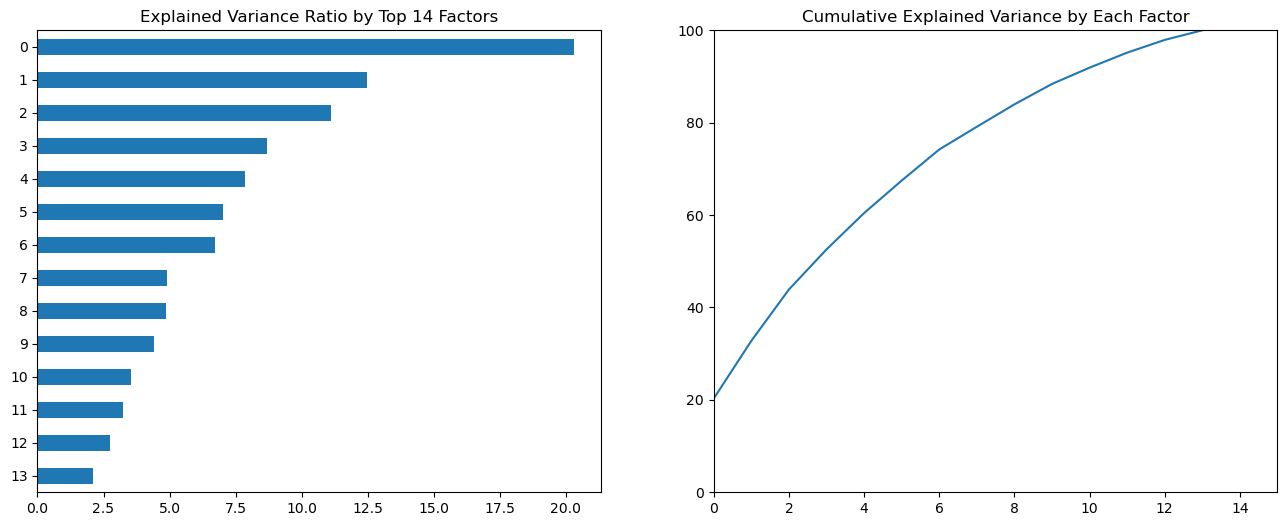

In [62]:
NumEigenvalues = 14

fig, axes = plt.subplots(ncols = 2,
                         figsize = (16, 6)
                         )

Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]
                   ).sort_values() * 100

Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]
                   ).cumsum()*100

Series1.plot.barh(ylim = (0, 9),
                  title = "Explained Variance Ratio by Top 14 Factors",
                  ax = axes[0]
                  );

Series2.plot(ylim = (0, 100),
             xlim = (0, 15),
             ax = axes[1],
             title = "Cumulative Explained Variance by Each Factor");

In [63]:
pd.Series((pca.explained_variance_ratio_)
          ).to_frame("Explained Variance").head(NumEigenvalues).style.format("{:,.2%}".format)

,Explained Variance
0,20.32%
1,12.48%
2,11.10%
3,8.67%
4,7.86%
5,7.03%
6,6.73%
7,4.91%
8,4.85%
9,4.41%


## Using the top 3 PCA component averaged weight loadings to multiply exogenous variables to run OLS regression

In [64]:
# get sum of weights for first 3 principle components
char_weights_pca = pca.components_[0,:] + pca.components_[1,:] + pca.components_[2,:]
# define number of characteristics to include in index
top_n = 14

# get boolean array of top n elements
bool_top_char = abs(char_weights_pca) > np.sort(abs(char_weights_pca))[len(char_weights_pca)-top_n]

# create data structures with weights and characteristic names that define index
index_char_weights = (char_weights_pca[bool_top_char])
index_char = GPEX3.columns[bool_top_char]

In [65]:
index_char_weights

array([ 0.35328243,  0.53062705, -0.33177408, -0.54350397, -0.64918401,
        0.24651611, -0.23135473,  0.80473382, -0.26483313, -0.54070529,
       -0.19004251,  0.58494667,  0.5135528 ])

<function matplotlib.pyplot.show(close=None, block=None)>

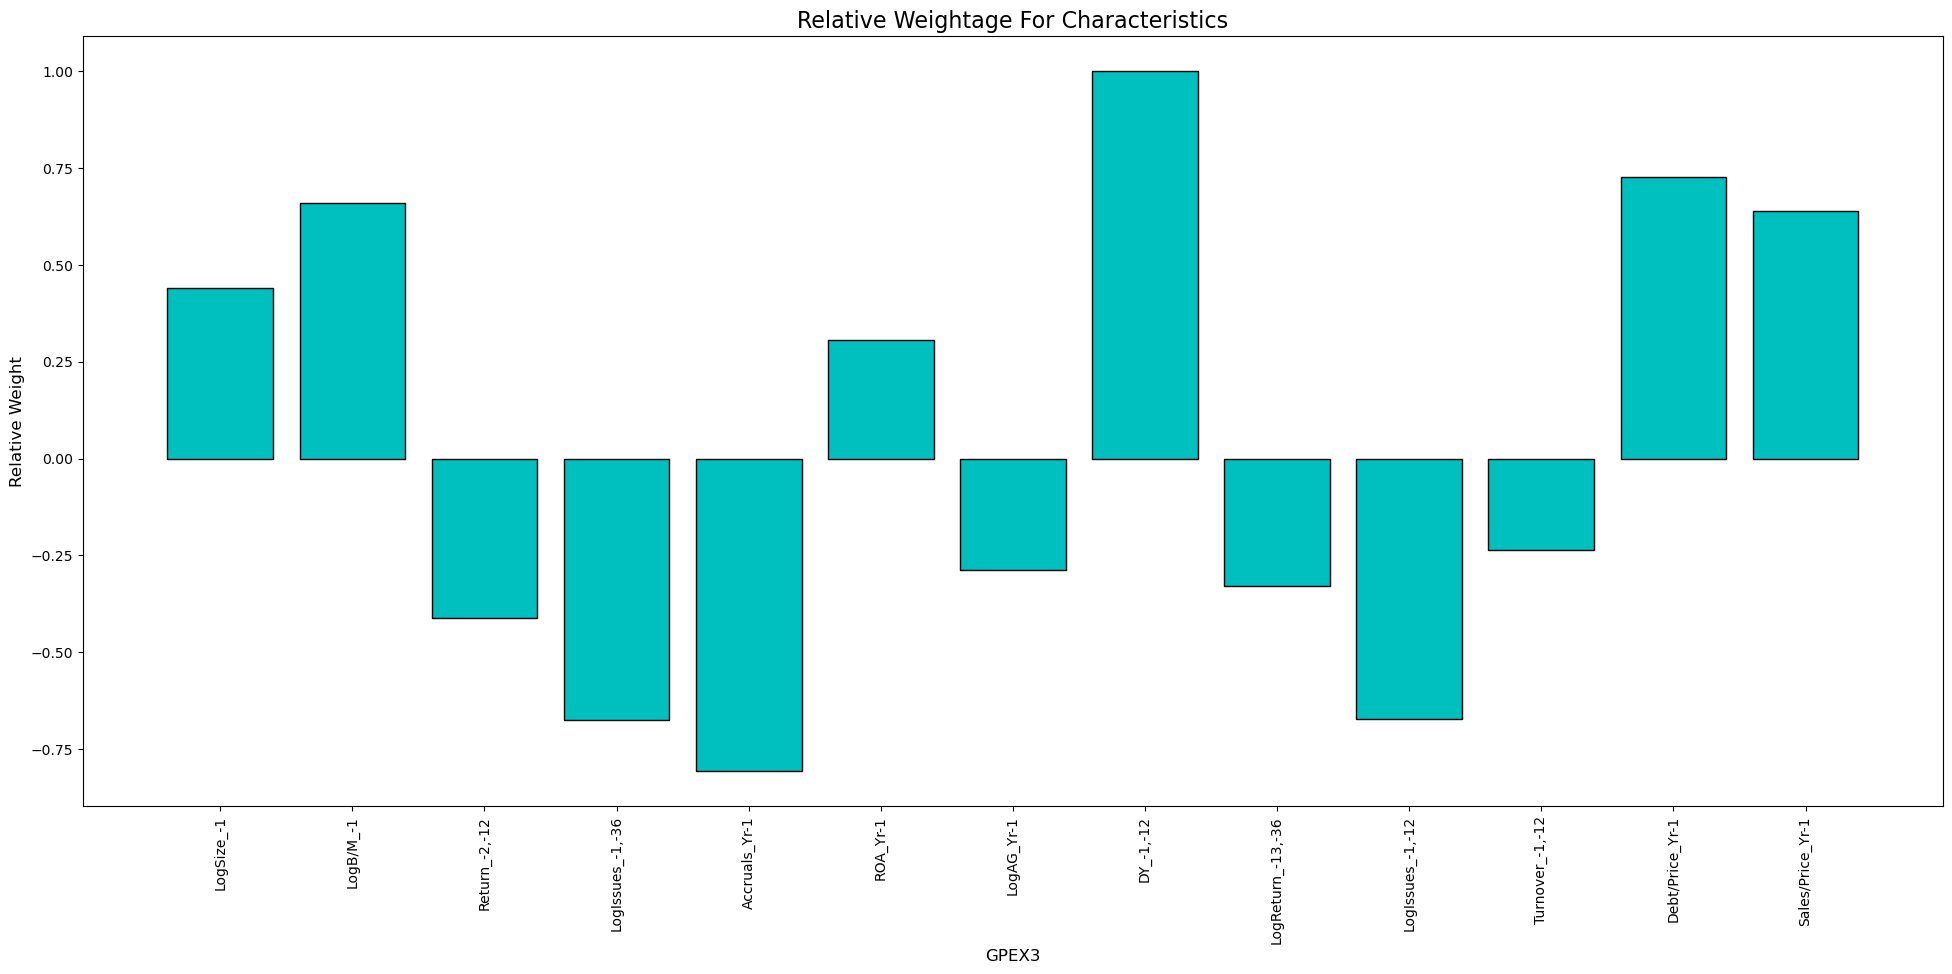

In [66]:
# Showing top 9 index weighted characteristics
import matplotlib.pyplot as plt

# create figure
plt.figure(figsize=(24, 10))

plt.bar(np.arange(len(index_char_weights)), index_char_weights/np.max((index_char_weights)), color = 'c', edgecolor = 'k')
plt.title("Relative Weightage For Characteristics", fontsize=16)
plt.xticks(np.arange(len(index_char_weights)), index_char, rotation=90)
plt.xlabel('GPEX3', fontsize=12)
plt.ylabel('Relative Weight', fontsize=12)
plt.show

In [67]:
characteristics2 = GPEX3.sort_index(level=0).loc['1980-01-31':]

# Multiply pca index weights to GPEX3 characteristics
results2 = characteristics2.reset_index(level=1).iloc[:,2:] * index_char_weights
results2
#results2.reset_index(inplace = True,drop = True)

,LogSize_-1,LogB/M_-1,"Return_-2,-12","LogIssues_-1,-36",Accruals_Yr-1,ROA_Yr-1,LogAG_Yr-1,"DY_-1,-12","LogReturn_-13,-36","LogIssues_-1,-12","Turnover_-1,-12",Debt/Price_Yr-1,Sales/Price_Yr-1
Date,,,,,,,,,,,,,
1980-01-31,1.180241,-0.029989,-0.054117,-0.237139,-1.595045,0.009735,-0.049849,0.023187,-0.089515,-0.070912,-4034.841215,0.555404,1.687880
1980-01-31,2.019052,0.031059,-0.062692,-0.010948,17.223501,0.011849,-0.037074,0.051808,0.003637,-0.006159,-6575.821485,0.651051,1.396255
1980-01-31,1.063965,-0.114121,0.119807,-0.357779,3.340701,0.001509,-0.147409,0.000000,-0.331042,-0.000279,-311.629972,2.319004,1.930732
1980-01-31,0.513140,-0.086045,-0.274253,-0.010573,-0.245392,0.006583,-0.026702,0.016095,-0.529663,-0.000000,-8066.569901,0.875281,3.149390
1980-01-31,2.012664,0.141526,-0.006515,-0.017048,12.122213,0.012772,-0.021433,0.068230,0.044996,-0.003528,-4861.948891,0.484534,2.268682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-31,3.448058,-1.298220,-0.092545,-0.082794,-211.288620,-0.110048,-0.097009,0.000000,0.005510,-0.018006,-23678.679901,0.010256,0.006513
2021-03-31,2.663974,-0.765985,-0.280683,-0.025740,70.648748,-0.002335,-0.012551,0.000000,-0.022688,-0.009404,-52293.600760,0.103816,0.290782
2021-03-31,2.217315,-1.626780,-0.033647,-0.022963,4.284614,0.001958,0.000059,0.021000,-0.057732,-0.005036,-16388.220530,0.117027,0.428258


In [68]:
# Check percentage of negative values after pca weight vector multiplication
neg = ((results2 < 0).sum().sum())/(len(results2))
neg

5.6675237959229765

### Run OLS regression on PCA component weighted exogenous characteristics to forecast returns
$Y_{i} = \alpha + BX_{i} + \epsilon_{i}$

where $B$ = PCA index weights of a combination of top 3 PCA explained variance components

and $X_{i}$ = characteristics of model 3

$Y_{i}$ = forecasted returns

$\epsilon_{i}$ = error term

In [69]:
x = results2.values.tolist()
y = characteristics2["Return"].tolist()

print(len(x))
print(len(y))

1204408
1204408


In [70]:
#Run a OLS with weighted top 3 PCA components
x = sm.add_constant(x)
OLS = sm.OLS(y , x, missing = 'drop').fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     100.9
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          2.96e-272
Time:                        18:23:18   Log-Likelihood:             5.3113e+05
No. Observations:             1204408   AIC:                        -1.062e+06
Df Residuals:                 1204394   BIC:                        -1.062e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.000     33.271      0.000       0.016       0.018
x1            -0.0015      0.000     -5.811      0.000      -0.002      -0.001
x2             0.0050      0.000     11.120      0.000       0.004       0.006
x3            -0.0084      0.001     -8.374      0.000      -0.010      -0.006
x4             0.0026      0.001      2.702      0.007       0.001       0.004
x5          9.219e-08    7.5e-07      0.123      0.902   -1.38e-06    1.56e-06
x6             0.0303      0.005      5.906      0.000       0.020       0.040
x7             0.0386      0.003     11.697      0.000       0.032       0.045
x8             0.0323      0.009      3.517      0.000       0.014       0.050
x9             0.0033      0.001      4.293      0.000       0.002       0.005
x10           -0.0115      0.002     -5.297      0.000      -0.016      -0.007
x11         3.179e-08   7.84e-09      4.057      0.000    1.64e-08    4.71e-08
x12           -0.0031      0.000     -7.662      0.000      -0.004      -0.002
x13            0.0018      0.000     12.566      0.000       0.002       0.002
==============================================================================
Omnibus:                  1493540.524   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4029178033.076
Skew:                           5.725   Prob(JB):                         0.00
Kurtosis:                     286.121   Cond. No.                     1.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# PCA weighted exogenous variable constant term from OLS regression
pca_constant = OLS.params[0]
pca_constant

0.016630414636079366

In [72]:
### Calculate predicted Y using the regressed coefficients results

for i in range(len(index_char[1:])):
    GPEX3_accuracy["PCA Predicted"] = pca_constant + np.sum(OLS.params[i]*x,axis = 1)
GPEX3_accuracy

Actual Returns  Predicted Returns  Actual Direction  \
Date       GVKEY                                                         
1980-01-31 1004          0.226695           0.007877               1.0   
           1010          0.211679           0.008359               1.0   
           1020         -0.035714           0.009767              -1.0   
           1025          0.201539           0.015071               1.0   
           1040         -0.008547           0.006613              -1.0   
...                           ...                ...               ...   
2021-03-31 264265       -0.046658           0.010056              -1.0   
           264416        0.251401           0.013081               1.0   
           268208        0.110647           0.014967               1.0   
           294524        0.019498           0.008743               1.0   
           316056        0.158117           0.011992               1.0   

                   Predicted Direction  Accuracy  Year  Strategy Returns  \
Date       GVKEY                                                           
1980-01-31 1004                    1.0       0.0  1980          0.226695   
           1010                    1.0       0.0  1980          0.211679   
           1020                    1.0       2.0  1980         -0.035714   
           1025                    1.0       0.0  1980          0.201539   
           1040                    1.0       2.0  1980         -0.008547   
...                                ...       ...   ...               ...   
2021-03-31 264265                  1.0       2.0  2021         -0.046658   
           264416                  1.0       0.0  2021          0.251401   
           268208                  1.0       0.0  2021          0.110647   
           294524                  1.0       0.0  2021          0.019498   
           316056                  1.0       0.0  2021          0.158117   

                   PCA Predicted  
Date       GVKEY                  
1980-01-31 1004         0.016502  
           1010         0.016422  
           1020         0.016621  
           1025         0.016374  
           1040         0.016476  
...                          ...  
2021-03-31 264265       0.015871  
           264416       0.014970  
           268208       0.016110  
           294524       0.015763  
           316056       0.015593  

[1204408 rows x 8 columns]

In [73]:
def accuracy(df_forecast, signal = 'Predicted Returns'):

    df_forecast['Actual Direction'] = np.sign(df_forecast['Actual Returns'])
    df_forecast['Predicted Direction'] = np.sign(df_forecast[signal])
    df_forecast['Accuracy'] = abs(df_forecast['Actual Direction'] - df_forecast['Predicted Direction'])


    correct = len(df_forecast[df_forecast['Accuracy'] == 0])
    zero_rets = len(df_forecast[df_forecast['Accuracy'] == 1])
    data_count = len(df_forecast)

    GPEX3_forecast2['Year'] = GPEX3_forecast2.index.get_level_values(0).year

    print(f'Accuracy when Actual Returns = 0 are included as correct prediction is: {((correct+zero_rets)/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are not included as correct prediction is: {(correct/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are totally excluded from prediction is: {(correct/(data_count - zero_rets))*100:.4f}%\n')

    return df_forecast

In [74]:
pca_accuracy = accuracy(GPEX3_forecast, signal = 'PCA Predicted')

Accuracy when Actual Returns = 0 are included as correct prediction is: 53.6381%

Accuracy when Actual Returns = 0 are not included as correct prediction is: 50.4830%

Accuracy when Actual Returns = 0 are totally excluded from prediction is: 52.1277%



In [75]:
def backtester(df_accuracy, signal = 'Predicted Returns'):

    df_accuracy['Strategy Returns'] = df_accuracy['Predicted Direction'] * df_accuracy['Actual Returns']
    df_accuracy['Year'] = df_accuracy.index.get_level_values(0).year
    simple_avg = (np.sum(df_accuracy[['Actual Returns',signal,'Strategy Returns']],axis=0)/len(df_accuracy)) * 12

    df_accuracy.reset_index().set_index(['Year','Date','GVKEY'])
    df_backtest = (df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']] * 100 * 12
    avg_by_year = ((df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']].mean()) * 12

    for column in df_backtest.columns:
        for i in range(len(df_backtest[column])):
            df_backtest[column].iloc[i] = str(round(df_backtest[column].iloc[i],4)) + '%'

    print(f'The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:\n{(simple_avg*100)}\n')
    print(f'The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:\n{(avg_by_year*100)}')

    return df_backtest

In [76]:
pca_backtest = backtester(pca_accuracy, signal = 'PCA Predicted')

The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:
Actual Returns      14.613753
PCA Predicted       19.209615
Strategy Returns    14.613753
dtype: float64

The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:
Actual Returns      15.868699
PCA Predicted       19.203182
Strategy Returns    15.868699
dtype: float64


In [77]:
pca_backtest

,Actual Returns,PCA Predicted,Strategy Returns
Year,,,
1980,30.0304%,19.6919%,30.0304%
1981,5.5349%,19.6846%,5.5349%
1982,27.4998%,19.7216%,27.4998%
1983,34.5933%,19.6217%,34.5933%
1984,-1.8211%,19.6527%,-1.8211%
1985,20.9491%,19.6441%,20.9491%
1986,9.3092%,19.5786%,9.3092%
1987,0.2731%,19.5356%,0.2731%
1988,20.0377%,19.5608%,20.0377%


# <font color = 'orange'> Improved Model 1: Second Stage OLS Regression by GVKEYs</font>

In this section, we aim to build a cross-section second stage OLS model by regressing the Actual Returns on Factor Loadings from first stage regression by company GVKEYs, and fit in the Factor Loadings as $b_i$ characteristics on the regressed beta to arrive at **individual company risk premia**. 

Here, we do not perform any feature engineering since we found that all the exogenous variables are proven to be significant from our PCA analysis. We also keep the prediction & strategy methodologies in line with the original model from question 3 & 4 so that we can compare apple-to-apple

In [78]:
def cs_ols_gvkey(df):
    cs_stats = []
    cs_result = {}
    
    for GVKEY, datapoints in df.groupby('GVKEY'):
        if datapoints.count().min() >= 0:        
            OLS = sm.OLS(datapoints['Return'],datapoints.iloc[:,2:]).fit()
            OLS_stats = OLS.params 
            OLS_stats.name = GVKEY
            OLS_stats['Adj $\mathbb{R}^2$'] = OLS.rsquared_adj
            OLS_stats['N.Obs'] = OLS.nobs
            cs_stats.append(OLS_stats)
            cs_result[GVKEY] = OLS
    
    cs_stats = pd.DataFrame(cs_stats)
    return cs_stats, cs_result

In [79]:
GPEX3_GVKEY = GPEX3.reset_index(level=1)

In [80]:
GPEX3_GVKEY = GPEX3_GVKEY.iloc[:,:2]

In [81]:
GPEX3_GVKEY_reg = GPEX3_GVKEY.merge(GPEX3_summary.iloc[:,:-2], left_index = True, right_index = True)
GPEX3_GVKEY_reg = GPEX3_GVKEY_reg.reset_index().rename(columns={'index':'Date'}).set_index(['GVKEY','Date']).sort_index(level=0)
GPEX3_GVKEY_reg

Return     const  LogSize_-1  LogB/M_-1  Return_-2,-12  \
GVKEY  Date                                                                   
1000   1974-04-30  0.095238 -0.049612    0.001233   0.002888       0.035946   
       1974-05-31 -0.130435 -0.089151    0.002342  -0.005045      -0.002526   
       1974-06-30  0.050000 -0.015325    0.001185   0.011479       0.049092   
       1974-07-31 -0.142857 -0.044635   -0.004307   0.039476       0.087047   
       1974-08-31  0.166667 -0.066319   -0.006777   0.007380       0.055175   
...                     ...       ...         ...        ...            ...   
317264 2020-08-31 -0.011710  0.055294   -0.005892  -0.007872      -0.052858   
       2020-09-30 -0.050948  0.009534   -0.005630  -0.010280       0.021518   
       2020-10-31  0.023720  0.029143   -0.004502  -0.011893      -0.021641   
       2020-11-30  0.332927  0.208749   -0.010434   0.016920      -0.065480   
       2020-12-31  0.115279  0.188331   -0.014367  -0.003838      -0.002568   

                   LogIssues_-1,-36  Accruals_Yr-1  ROA_Yr-1  LogAG_Yr-1  \
GVKEY  Date                                                                
1000   1974-04-30         -0.015042       0.000009 -0.022308   -0.013311   
       1974-05-31         -0.008381      -0.000014  0.197943   -0.016616   
       1974-06-30         -0.004050      -0.000007  0.096022   -0.044885   
       1974-07-31         -0.018843       0.000005  0.161826   -0.021645   
       1974-08-31          0.005354      -0.000058 -0.015253   -0.049738   
...                             ...            ...       ...         ...   
317264 2020-08-31         -0.048793      -0.000003 -0.012092    0.038014   
       2020-09-30         -0.027426      -0.000002  0.042102    0.019001   
       2020-10-31         -0.015183       0.000004  0.039888    0.002423   
       2020-11-30          0.044577      -0.000003 -0.041070   -0.024447   
       2020-12-31         -0.034911      -0.000009 -0.021544   -0.039454   

                   DY_-1,-12  LogReturn_-13,-36  LogIssues_-1,-12  \
GVKEY  Date                                                         
1000   1974-04-30   0.158722           0.016427         -0.016438   
       1974-05-31   0.242380           0.021895         -0.023711   
       1974-06-30   0.017344           0.024867          0.035458   
       1974-07-31   0.382997           0.039305          0.005348   
       1974-08-31   0.336449           0.008035         -0.001626   
...                      ...                ...               ...   
317264 2020-08-31  -0.281263           0.018400          0.112001   
       2020-09-30  -0.236697           0.000574          0.093718   
       2020-10-31   0.006430          -0.005696         -0.027362   
       2020-11-30  -0.194055           0.006846         -0.099330   
       2020-12-31  -0.639728           0.013014          0.081276   

                   Turnover_-1,-12  Debt/Price_Yr-1  Sales/Price_Yr-1  
GVKEY  Date                                                            
1000   1974-04-30    -4.444862e-07        -0.003116          0.003812  
       1974-05-31    -6.397301e-07         0.001427          0.001818  
       1974-06-30    -3.564410e-07        -0.002683         -0.000088  
       1974-07-31     5.549416e-08         0.006504         -0.001388  
       1974-08-31     5.923872e-07        -0.001431          0.000809  
...                            ...              ...               ...  
317264 2020-08-31     4.664999e-08         0.013033          0.010563  
       2020-09-30    -7.529508e-08         0.003424          0.001515  
       2020-10-31     3.303293e-08        -0.001298          0.004840  
       2020-11-30     2.306914e-07         0.028487          0.005928  
       2020-12-31     1.617934e-08         0.002417         -0.001618  

[1357666 rows x 15 columns]

In [ ]:
GPEX3_GVKEY_summary,GPEX3_GVKEY_results = cs_ols_gvkey(GPEX3_GVKEY_reg)
GPEX3_GVKEY_summary

In [ ]:
gvkey_FL = GPEX3_GVKEY_summary.iloc[:,:-2]
gvkey_characteristics = GPEX3_GVKEY_reg.reset_index(level=1).iloc[:,3:]
results = np.sum(gvkey_characteristics * gvkey_FL.iloc[:,1:],axis = 1) 
results.reset_index(inplace = True, drop = True)
results

# <font color='orange'>Here are the Predicted Returns for second stage regression by GVKEYs, ala Question 3</font>

In [ ]:
GPEX3_GVKEY_pred = GPEX3_GVKEY_reg.iloc[:,:1].reset_index()
GPEX3_GVKEY_pred['Predicted Returns'] = results 
GPEX3_GVKEY_pred = GPEX3_GVKEY_pred.set_index(['GVKEY','Date'])
GPEX3_GVKEY_pred.rename(columns={'Return':'Actual Returns'},inplace = True)
GPEX3_GVKEY_pred = GPEX3_GVKEY_pred.reset_index().set_index(['Date','GVKEY']).sort_index(level=0).loc['1980-01-31':]
GPEX3_GVKEY_pred

# <font color='orange'>Here are its accuracy. we note that the second stage OLS by GVKEYs performs more accurate predictions</font>

In [ ]:
GPEX3_GVKEY_forecast = accuracy(GPEX3_GVKEY_pred)

In [ ]:
GPEX3_GVKEY_forecast

In [ ]:
def GVKEY_backtester(df_accuracy, signal = 'Predicted Returns'):
    
    df_accuracy['Strategy Returns'] = df_accuracy['Predicted Direction'] * df_accuracy['Actual Returns']
    df_accuracy['Year'] = df_accuracy.index.get_level_values(1).year
    simple_avg = (np.sum(df_accuracy[['Actual Returns',signal,'Strategy Returns']],axis=0)/len(df_accuracy)) * 12
    
    df_accuracy.reset_index().set_index(['Year','Date','GVKEY'])
    df_backtest = (df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']] * 100 * 12
    avg_by_year = ((df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']].mean()) * 12
    
    for column in df_backtest.columns:
        for i in range(len(df_backtest[column])):
            df_backtest[column].iloc[i] = str(round(df_backtest[column].iloc[i],4)) + '%'
        
    print(f'The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:\n{(simple_avg*100)}\n')
    print(f'The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:\n{(avg_by_year*100)}')
    
    return df_backtest

### <font color='orange'>And here are the Strategy Returns of the second stage OLS by GVKEYs. Note that the model did not particularly forecast good returns, but in reality the strategy made much higher returns against Actual returns (55.7% versus 14.6% average returns by simple average of entire time series </font>

In [ ]:
GPEX3_GVKEY_backtest = backtester(GPEX3_GVKEY_forecast)

### <font color='orange'>Here are the arithmetic, annualized Strategy Returns for the second stage OLS by GVKEYs</font>

In [ ]:
GPEX3_GVKEY_backtest

# ARIMA Model Summary:
Based on the results of ARIMA we can conclude that predicted returns yields 18.84% total average returns compared to actual returns of 15.86%.

### We perform ARIMA regression on Model 3's cross sectional regression estimates with the assumption that there is autocorrelation present in the lags of the regressed Beta coefficients. Thereafter we substitute the ARIMA regressed Beta coefficients back into the cross sectional regression equation to derive a new set of forecasts as returns.

Where $Y_{i} = \alpha + BX_{i} + \epsilon_{i}$ is our first stage cross sectional regression on Model 3

where $B$ = ARIMA regressed Beta coefficients

and $X_{i}$ = characteristics of model 3

$Y_{i}$ = newly forecasted returns

$\epsilon_{i}$ = error term

In [ ]:
from pandas.plotting import lag_plot
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from statsmodels.tsa.stattools import adfuller # Adfuller unit root test and stationarity test
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['10%']
    if (pvalue < 0.10) and (adf < critical_value):   ### and because statsmodel adfuller p-value is not as accurate
        print('The series is stationary') # H0: Assume data is stationary
    else:
        print('The series is NOT stationary') # H0: Assume data is stationary

### Stationarity Check on Model 3 OLS regressed results

In [ ]:
GPEX3_summary2 = GPEX3_summary.iloc[:,1:-2]
GPEX3_summary2

for i in range(len(GPEX3_summary2.columns)):
    print('ADF Statistic: %f' % adfuller(GPEX3_summary2.iloc[:,i])[0])
    print('p-value: %f' % adfuller(GPEX3_summary2.iloc[:,i])[1])
    check_stationarity(GPEX3_summary2.iloc[:,i])

### PACF to identify MA process

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in range(len(GPEX3_summary2.columns)):
    plot_pacf(GPEX3_summary2.iloc[:,i])
    plt.title("PACF - {}".format(GPEX3_summary2.columns[i]))
    plt.show()

### ACF to identify AR process

In [ ]:
for i in range(len(GPEX3_summary2.columns)):
    plot_acf(GPEX3_summary2.iloc[:,i])
    plt.title("ACF - {}".format(GPEX3_summary2.columns[i]))
    plt.show()

### Applying AutoArima to derive ARIMA p,d,q order process

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from pmdarima.arima import auto_arima

In [ ]:
GPEX3_list = GPEX3_summary2.columns.tolist()
GPEX3_list

In [ ]:
#'LogSize_-1'

model_logsize = pm.auto_arima(GPEX3_summary2.iloc[:,-13], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_logsize.summary())
print(model_logsize.params())

pred1 = pd.DataFrame(model_logsize.predict_in_sample())
pred1.columns = [GPEX3_list[-13]]
pred1

In [ ]:
# 'LogB/M_-1'
model_logbm = pm.auto_arima(GPEX3_summary2.iloc[:,-12], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_logbm.summary())
print(model_logbm.params())

pred2 = pd.DataFrame(model_logbm.predict_in_sample())
pred2.columns = [GPEX3_list[-12]]
pred2

In [ ]:
# 'Return_-2,-12'
model_return = pm.auto_arima(GPEX3_summary2.iloc[:,-11], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_return.summary())
print(model_return.params())

pred3 = pd.DataFrame(model_return.predict_in_sample())
pred3.columns = [GPEX3_list[-11]]
pred3


In [ ]:
#'LogIssues_-1,-36',
model_logissue36 = pm.auto_arima(GPEX3_summary2.iloc[:,-10], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_logissue36.summary())
print(model_logissue36.params())

pred4 = pd.DataFrame(model_logissue36.predict_in_sample())
pred4.columns = [GPEX3_list[-10]]
pred4

In [ ]:
#'Accruals_Yr-1'
model_accruals = pm.auto_arima(GPEX3_summary2.iloc[:,-9], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_accruals.summary())
print(model_accruals.params())

pred5 = pd.DataFrame(model_accruals.predict_in_sample())
pred5.columns = [GPEX3_list[-9]]
pred5

In [ ]:
# 'ROA_Yr-1'
model_roa = pm.auto_arima(GPEX3_summary2.iloc[:,-8], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_roa.summary())
print(model_roa.params())

pred6 = pd.DataFrame(model_roa.predict_in_sample())
pred6.columns = [GPEX3_list[-8]]
pred6

In [ ]:
#  'LogAG_Yr-1'
model_logag = pm.auto_arima(GPEX3_summary2.iloc[:,-7], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_logag.summary())
print(model_logag.params())

pred7 = pd.DataFrame(model_logag.predict_in_sample())
pred7.columns = [GPEX3_list[-7]]
pred7

In [ ]:
# 'DY_-1,-12'
model_dy = pm.auto_arima(GPEX3_summary2.iloc[:,-6], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_dy.summary())
print(model_dy.params())

pred8 = pd.DataFrame(model_dy.predict_in_sample())
pred8.columns = [GPEX3_list[-6]]
pred8

In [ ]:
# 'LogReturn_-13,-36'
model_logreturn36 = pm.auto_arima(GPEX3_summary2.iloc[:,-5], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_logreturn36.summary())
print(model_logreturn36.params())

pred9 = pd.DataFrame(model_logreturn36.predict_in_sample())
pred9.columns = [GPEX3_list[-5]]
pred9

In [ ]:
# 'LogIssues_-1,-12'
model_logissue12 = pm.auto_arima(GPEX3_summary2.iloc[:,-4], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_logissue12.summary())
print(model_logissue12.params())

pred10 = pd.DataFrame(model_logissue12.predict_in_sample())
pred10.columns = [GPEX3_list[-4]]
pred10

In [ ]:
# 'Turnover_-1,-12'
model_turnover = pm.auto_arima(GPEX3_summary2.iloc[:,-3], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_turnover.summary())
print(model_turnover.params())

pred11 = pd.DataFrame(model_turnover.predict_in_sample())
pred11.columns = [GPEX3_list[-3]]
pred11

In [ ]:
# 'Debt/Price_Yr-1'
model_dp = pm.auto_arima(GPEX3_summary2.iloc[:,-2], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_dp.summary())
print(model_dp.params())

pred12 = pd.DataFrame(model_dp.predict_in_sample())
pred12.columns = [GPEX3_list[-2]]
pred12

In [ ]:
# 'Sales/Price_Yr-1'
model_sp = pm.auto_arima(GPEX3_summary2.iloc[:,-1], start_p=1, start_q=1,
                                      test='adf',       # use adftest to find optimal 'd'
                                      max_p=3, max_q=3, # maximum p and q
                                      m=1,              # frequency of series
                                      d=None,           # let model determine 'd'
                                      seasonal=False,   # No Seasonality
                                      start_P=0,
                                      D=0,
                                      trace=True,
                                      error_action='ignore',
                                      suppress_warnings=True,
                                      stepwise=True)


print(model_sp.summary())
print(model_sp.params())

pred13 = pd.DataFrame(model_sp.predict_in_sample())
pred13.columns = [GPEX3_list[-1]]
pred13

In [ ]:
frames = [pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8, pred9, pred10, pred11, pred12, pred13]
arima_df = pd.concat(frames, join="inner", axis=1)
arima_df = arima_df.loc['1980':]
arima_df

In [ ]:
test = GPEX3.sort_index(level=0).loc['1980':]
test.iloc[:,1:]

In [ ]:
test2 = test.reset_index(level=1)
test2

In [ ]:
test2.iloc[:,2:]

In [ ]:
take_GVKEY = GPEX3.sort_index(level=0).loc['1980-01-31':]
take_GVKEY.reset_index(level=1)['GVKEY']
take_GVKEY

### To improve our prediction results further, as our strategy we decide to flip the sign of our ARIMA prediction by multiplying -1 into our linear regression equation

In [ ]:
newdf = np.sum(-1 * arima_df * test2.iloc[:,2:],axis = 1) + GPEX3_summary.loc['1980-01-31':]['const']
newdf = pd.DataFrame(newdf,columns = ['Arima Predicted'])
newdf['GVKEY'] = take_GVKEY.reset_index(level=1)['GVKEY']
newdf = newdf.reset_index().rename(columns = {'index':'Date'}).set_index(['Date','GVKEY'])
newdf

In [ ]:
GPEX3_accuracy = pd.concat([GPEX3_accuracy,newdf], axis=1, join="outer")

In [ ]:
def accuracy(df_forecast, signal = 'Predicted Returns'):

    df_forecast['Actual Direction'] = np.sign(df_forecast['Actual Returns'])
    df_forecast['Predicted Direction'] = np.sign(df_forecast[signal])
    df_forecast['Accuracy'] = abs(df_forecast['Actual Direction'] - df_forecast['Predicted Direction'])


    correct = len(df_forecast[df_forecast['Accuracy'] == 0])
    zero_rets = len(df_forecast[df_forecast['Accuracy'] == 1])
    data_count = len(df_forecast)

    GPEX3_forecast2['Year'] = GPEX3_forecast2.index.get_level_values(0).year

    print(f'Accuracy when Actual Returns = 0 are included as correct prediction is: {((correct+zero_rets)/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are not included as correct prediction is: {(correct/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are totally excluded from prediction is: {(correct/(data_count - zero_rets))*100:.4f}%\n')

    return df_forecast

In [ ]:
GPEX3_forecast['Arima Predicted'] = newdf['Arima Predicted']

In [ ]:
arima_accuracy = accuracy(GPEX3_forecast, signal = 'Arima Predicted')

In [ ]:
def backtester(df_accuracy, signal = 'Predicted Returns'):

    df_accuracy['Strategy Returns'] = df_accuracy['Predicted Direction'] * df_accuracy['Actual Returns']
    df_accuracy['Year'] = df_accuracy.index.get_level_values(0).year
    simple_avg = (np.sum(df_accuracy[['Actual Returns',signal,'Strategy Returns']],axis=0)/len(df_accuracy)) * 12

    df_accuracy.reset_index().set_index(['Year','Date','GVKEY'])
    df_backtest = (df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']] * 100 * 12
    avg_by_year = ((df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']].mean()) * 12

    for column in df_backtest.columns:
        for i in range(len(df_backtest[column])):
            df_backtest[column].iloc[i] = str(round(df_backtest[column].iloc[i],4)) + '%'

    print(f'The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:\n{(simple_avg*100)}\n')
    print(f'The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:\n{(avg_by_year*100)}')

    return df_backtest

In [ ]:
arima_accuracy.rename(columns = {'Arima Predicted Direction':'Arima Predicted'}, inplace = True)

In [ ]:
arima_backtest = backtester(arima_accuracy, signal='Arima Predicted')

In [ ]:
arima_backtest

# VAR Model Summary:
 Our VAR model of order 26 yields a 49.52% accuracy and did not improve on the forecast/prediction results. One insight we see is that most of the slopes had relatively steady decline/incline closer to zero across time (see plot at line XX), which indicates that past estimates may overstate the cross-sectional dispersion in future returns. This confirms the findings from Lewellen, (2015) figure 1: Ten-year rolling slope estimates, 1974-2013.

In [ ]:
def forecastvar(df, df_summary, window = 120, start_date = '1980-1-31'):

    factorloadings = df_summary.iloc[:,:].rolling(window).mean().shift(1).dropna()

    characteristics = df.sort_index(level=0).loc[start_date:]
    df_actual_ret = df.loc[:,:'Return'].sort_index(level=0).reset_index(level=1).loc[start_date:]

    results = np.sum(characteristics.reset_index(level=1).iloc[:,2:] * factorloadings.iloc[:,1:],axis = 1)
    results += factorloadings.iloc[:,0]
    results.reset_index(inplace = True,drop = True)

    df_Returns = df.sort_index(level=0).loc[start_date:,:'Return']
    df_Returns.rename(columns={'Return':'Actual Returns'},inplace = True)
    df_Returns.reset_index(inplace = True)
    df_Returns['Predicted Returns'] = results
    df_Returns = df_Returns.set_index(['Date','GVKEY'])

    return df_Returns

def accuracyvar(df_forecast, signal = 'Predicted Returns'):

    df_forecast['Actual Direction'] = np.sign(df_forecast['Actual Returns'])
    df_forecast['Predicted Direction'] = np.sign(df_forecast[signal])
    df_forecast['Accuracy'] = abs(df_forecast['Actual Direction'] - df_forecast['Predicted Direction'])


    correct = len(df_forecast[df_forecast['Accuracy'] == 0])
    zero_rets = len(df_forecast[df_forecast['Accuracy'] == 1])
    data_count = len(df_forecast)

    GPEX4_forecast['Year'] = GPEX4_forecast.index.get_level_values(0).year

    print(f'Accuracy when Actual Returns = 0 are included as correct prediction is: {((correct+zero_rets)/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are not included as correct prediction is: {(correct/data_count)*100:.4f}%\n')
    print(f'Accuracy when Actual Returns = 0 are totally excluded from prediction is: {(correct/(data_count - zero_rets))*100:.4f}%\n')

    return df_forecast

def backtestervar(df_accuracy, signal = 'Predicted Returns'):

    df_accuracy['Strategy Returns'] = df_accuracy['Predicted Direction'] * df_accuracy['Actual Returns']
    df_accuracy['Year'] = df_accuracy.index.get_level_values(0).year
    simple_avg = (np.sum(df_accuracy[['Actual Returns',signal,'Strategy Returns']],axis=0)/len(df_accuracy)) * 12

    df_accuracy.reset_index().set_index(['Year','Date','GVKEY'])
    df_backtest = (df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']] * 100 * 12
    avg_by_year = ((df_accuracy.groupby('Year').mean())[['Actual Returns',signal,'Strategy Returns']].mean()) * 12

    for column in df_backtest.columns:
        for i in range(len(df_backtest[column])):
            df_backtest[column].iloc[i] = str(round(df_backtest[column].iloc[i],4)) + '%'

    print(f'The total average (in %) for Actual & Predicted Returns by simple average of entire time series are:\n{(simple_avg*100)}\n')
    print(f'The total average (in %) for Actual & Predicted Returns if observations are grouped by years are:\n{(avg_by_year*100)}')

    return df_backtest

### Check for Stationarity

In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(GPEX3_summary.iloc[:,1])

In [ ]:
adf_test(GPEX3_summary.iloc[:,2])

In [ ]:
adf_test(GPEX3_summary.iloc[:,3])

In [ ]:
adf_test(GPEX3_summary.iloc[:,4])

In [ ]:
adf_test(GPEX3_summary.iloc[:,5])

In [ ]:
adf_test(GPEX3_summary.iloc[:,6])

In [ ]:
adf_test(GPEX3_summary.iloc[:,7])

In [ ]:
adf_test(GPEX3_summary.iloc[:,8])

In [ ]:
adf_test(GPEX3_summary.iloc[:,9])

In [ ]:
adf_test(GPEX3_summary.iloc[:,10])

In [ ]:
adf_test(GPEX3_summary.iloc[:,11])

In [ ]:
adf_test(GPEX3_summary.iloc[:,12])

In [ ]:
adf_test(GPEX3_summary.iloc[:,13])

All predictor variables have no unit root and is stationary.

### Train-Test Split

In [ ]:
df = GPEX3_summary.iloc[:,1:14]
df

In [ ]:
train = df.iloc[:492,:]
train

In [ ]:
test = df.iloc[:,:]
test

### Grid Search for Order P

In [ ]:
from statsmodels.tsa.api import VAR


for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    model = VAR(GPEX3)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

As the value of the P model increases, BIC/SIC/SC penalizes the model for complexity. BIC reaches the lowest point at order 26  before increasing again. So we choose to build VAR model of order 26.

### Fit VAR(26) Model

In [ ]:
model = VAR(train)
results = model.fit(maxlags=26, ic='aic')

In [ ]:
lag_order = results.k_ar
forecast_input = test.values[-lag_order:]
fc = results.forecast(y=forecast_input, steps=len(test))
df_forecast = pd.DataFrame(fc, index=test.index, columns=test.columns + '_forecast')

In [ ]:
lag_order = results.k_ar
forecast_input = test.values[-lag_order:]
fc = results.forecast(y=forecast_input, steps=len(test))
df_forecast = pd.DataFrame(fc, index=test.index, columns=test.columns + '_forecast')

In [ ]:
df_forecast

In [ ]:
# plt.plot(train['LogSize_-1'], label='Train')
plt.plot(test['LogSize_-1'], label='Test')
plt.plot(df_forecast['LogSize_-1_forecast'], label='VAR Forecast')
plt.legend(loc='best')
plt.show()

### Predict Test Data

In [ ]:
GPEX4_forecast = forecastvar(GPEX3,df_forecast)
GPEX4_forecast

In [ ]:
GPEX4_accuracy = accuracyvar(GPEX4_forecast)

In [ ]:
GPEX4_backtest = backtestervar(GPEX4_accuracy)

In [ ]:
GPEX4_backtest